In [7]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats.distributions import chi2

In [8]:
# data
N = 10000
σ2 = 1/3
x = np.random.uniform(-1, 1, size=N)
X = np.hstack([x.reshape(-1, 1), np.ones((N, 1))])
w = np.array([2, 1]).reshape(-1, 1)
y = (X @ w) + np.random.normal(loc=0, scale=σ2 ** 0.5, size=(N, 1))
print(x.shape, X.shape, y.shape)

(10000,) (10000, 2) (10000, 1)


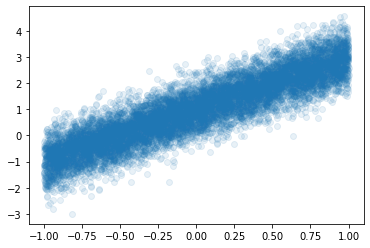

In [9]:
plt.scatter(x, y, alpha=0.1)
plt.show()

In [10]:
# prior hyper-parameters
w0 = np.array([[0], [0]])
V0 = np.eye(2)
a0 = 1
b0 = 1

In [11]:
# posterior parameters
VN = inv(inv(V0) + X.T @ X)
wN = VN @ (inv(V0) @ w0 + X.T @ y)
aN = a0 + N/2
bN = b0 + 0.5 * (w0.T @ inv(V0) @ w0 + y.T @ y - wN.T @ inv(VN) @ wN)

In [12]:
wN, VN, bN / (aN + 1), bN ** 2 / ((aN - 1) ** 2 * (aN - 2))

(array([[1.98912007],
        [1.0045555 ]]),
 array([[3.03059256e-04, 1.99430651e-07],
        [1.99430651e-07, 9.99901322e-05]]),
 array([[0.32453884]]),
 array([[2.10861646e-05]]))